In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
sector_list=['Agriculture','Fishing','Mining and Quarrying','Food & Beverages', 'Textiles and Wearing Apparel','Wood and Paper', 'Petroleum, Chemical and Non-Met','Metal Products', 'Electrical and Machinery', 'Transport Equipment','Other Manufacturing','Recycling','Electricity, Gas and Water','Construction', 'Maintenance and Repair', 'Wholesale Trade', 'Retail Trade', 'Hotels and Restraurants', 'Transport', 'Post and Telecommunications', 'Finacial Intermediation and Bus', 'Public Administration', 'Education, Health and Other Ser', 'Private Households', 'Others', 'Re-export & Re-import']

df_BII=pd.read_excel('/Users/LittleStupidCuteBear/Desktop/Research/20240709 new IPF with rectangular matrix/All_3 decades_Agriculture.xlsx')
df_BII=df_BII[['Country','Year','Income_level_2000','Land_area_2000','Population_2000','IPF_20_ud','BII_20_ud','IPF_10_uudd']]

for sector_name in sector_list:
    df_econ=pd.read_excel('/Users/LittleStupidCuteBear/Desktop/Research/20240709 new IPF with rectangular matrix/Trade_EORA_all_sectors_'+f'{sector_name}.xlsx')
    df_econ=df_econ[['Country','Year','Out Degree Centrality of the sector of country i, excluding internal consumption NOT NORMALIZED','Out Degree Centrality of the sector in country i, INCLUDING internal consumption NOT NORMALIZED']]
    df_BII = df_BII.merge(df_econ, left_on=['Country', 'Year'], right_on=['Country', 'Year'], how='left')
    df_BII.rename(columns={'Out Degree Centrality of the sector of country i, excluding internal consumption NOT NORMALIZED':'Econ Gain_{}'.format(sector_name)}, inplace=True)
    df_BII.rename(columns={'Out Degree Centrality of the sector in country i, INCLUDING internal consumption NOT NORMALIZED':'GNP_{}'.format(sector_name)}, inplace=True)
    print('Done'+'_{}'.format(sector_name))

Done_Agriculture
Done_Fishing
Done_Mining and Quarrying
Done_Food & Beverages
Done_Textiles and Wearing Apparel
Done_Wood and Paper
Done_Petroleum, Chemical and Non-Met
Done_Metal Products
Done_Electrical and Machinery
Done_Transport Equipment
Done_Other Manufacturing
Done_Recycling
Done_Electricity, Gas and Water
Done_Construction
Done_Maintenance and Repair
Done_Wholesale Trade
Done_Retail Trade
Done_Hotels and Restraurants
Done_Transport
Done_Post and Telecommunications
Done_Finacial Intermediation and Bus
Done_Public Administration
Done_Education, Health and Other Ser
Done_Private Households
Done_Others
Done_Re-export & Re-import


In [3]:
df_BII.head()

,Country,Year,Income_level_2000,Land_area_2000,Population_2000,IPF_20_ud,BII_20_ud,IPF_10_uudd,Econ Gain_Agriculture,GNP_Agriculture,Econ Gain_Fishing,GNP_Fishing,Econ Gain_Mining and Quarrying,GNP_Mining and Quarrying,Econ Gain_Food & Beverages,GNP_Food & Beverages,Econ Gain_Textiles and Wearing Apparel,GNP_Textiles and Wearing Apparel,Econ Gain_Wood and Paper,GNP_Wood and Paper,"Econ Gain_Petroleum, Chemical and Non-Met","GNP_Petroleum, Chemical and Non-Met",Econ Gain_Metal Products,GNP_Metal Products,Econ Gain_Electrical and Machinery,GNP_Electrical and Machinery,Econ Gain_Transport Equipment,GNP_Transport Equipment,Econ Gain_Other Manufacturing,GNP_Other Manufacturing,Econ Gain_Recycling,GNP_Recycling,"Econ Gain_Electricity, Gas and Water","GNP_Electricity, Gas and Water",Econ Gain_Construction,GNP_Construction,Econ Gain_Maintenance and Repair,GNP_Maintenance and Repair,Econ Gain_Wholesale Trade,GNP_Wholesale Trade,Econ Gain_Retail Trade,GNP_Retail Trade,Econ Gain_Hotels and Restraurants,GNP_Hotels and Restraurants,Econ Gain_Transport,GNP_Transport,Econ Gain_Post and Telecommunications,GNP_Post and Telecommunications,Econ Gain_Finacial Intermediation and Bus,GNP_Finacial Intermediation and Bus,Econ Gain_Public Administration,GNP_Public Administration,"Econ Gain_Education, Health and Other Ser","GNP_Education, Health and Other Ser",Econ Gain_Private Households,GNP_Private Households,Econ Gain_Others,GNP_Others,Econ Gain_Re-export & Re-import,GNP_Re-export & Re-import
0,AFG,1990,Low Income,652860,19542982,d,d,ud,2773.048480,2.127945e+04,19.521334,98.393434,58.907382,2001.037382,77.211593,3.045561e+04,1236.473009,1.084120e+04,40.743425,28357.743425,168.434748,8.768433e+04,46.835186,4.391384e+04,194.930556,87358.930556,31.640102,38773.140102,36.549787,1438.069787,25.156083,440.701083,29.398541,3.968559e+03,76.711862,1727.931862,25.416440,30.973430,117.544767,7590.044767,48.954059,1096.134059,42.649521,1881.399521,679.399340,24419.299340,124.406043,32394.806043,80.566741,4.245866e+05,44.921470,1567.981470,233.917698,3.997002e+04,27.453255,27.558726,18.157222,18.259760,31.905819,32.008357
1,ALB,1990,Middle Income,27400,3089027,d,d,dd,1847.442119,2.098234e+05,30.742384,917.255384,171.411844,171.505102,704.736539,1.762377e+03,11355.455174,1.168985e+04,561.845501,1547.717501,3157.302929,6.204213e+03,3013.760232,4.541010e+03,2051.470135,5086.120135,35.427137,1384.227137,199.584595,248.379695,34.218393,48.686193,90.206810,3.917818e+02,207.580269,1308.520269,39.336578,72.236578,384.560122,44525.460122,47.990862,603.292862,125.909163,10987.609163,3725.767534,4395.235534,537.686334,1447.718334,82.289283,1.346159e+02,282.469022,283.462927,546.046150,5.546987e+02,35.100691,35.167716,18.460243,18.521292,36.162724,36.223772
2,DZA,1990,Middle Income,2381740,30774621,d,d,dd,1217.315806,5.507373e+05,28.390927,2367.750927,21252.186759,113602.286759,1431.358776,9.600746e+04,3060.528427,3.296243e+04,901.652295,89060.152295,374518.076708,6.469791e+05,18815.656111,1.553857e+05,3331.393612,274696.393612,761.830672,121374.830672,37.991224,4401.041224,39.778976,1333.208976,31.442502,5.541053e+03,10353.514976,100176.414976,194.932289,198.173129,25768.990953,30197.970953,1872.132946,10712.772946,1231.053159,2320.843159,126512.798569,126908.104569,37027.854412,37565.208412,81.726996,3.496740e+02,2950.962918,3336.144918,30287.880708,3.029428e+04,30.769393,30.895142,18.165344,18.278307,32.309439,32.422402
3,AGO,1990,Low Income,1246700,16394062,d,d,ud,169.153930,5.276535e+04,19.521334,243.506334,5395.525699,10915.015699,1020.622455,8.735802e+04,46.387054,2.734359e+04,42.900619,80521.800619,963.960791,2.496900e+05,44.778929,1.247178e+05,316.049435,248042.049435,197.809635,110303.809635,26.348709,4009.398709,21.663282,1202.493282,29.407380,1.122461e+04,983.662912,5676.362912,33.434973,49.053173,2282.836180,23520.036180,2211.216942,5187.206942,277.927414,5503.597414,36676.967281,104147.167281,5582.978816,97297.678816,80.589029,1.206561e+06,157.960090,4486.4400

In [4]:
gnp_columns = df_BII.filter(regex='^GNP_')
eg_columns = df_BII.filter(regex='^Econ Gain_')

gnp_sum = gnp_columns.sum(axis=1)
eg_sum = eg_columns.sum(axis=1)

df_BII['GNP Sum'] = gnp_sum
df_BII['Econ Gain Sum'] = eg_sum

df_BII.head()

,Country,Year,Income_level_2000,Land_area_2000,Population_2000,IPF_20_ud,BII_20_ud,IPF_10_uudd,Econ Gain_Agriculture,GNP_Agriculture,Econ Gain_Fishing,GNP_Fishing,Econ Gain_Mining and Quarrying,GNP_Mining and Quarrying,Econ Gain_Food & Beverages,GNP_Food & Beverages,Econ Gain_Textiles and Wearing Apparel,GNP_Textiles and Wearing Apparel,Econ Gain_Wood and Paper,GNP_Wood and Paper,"Econ Gain_Petroleum, Chemical and Non-Met","GNP_Petroleum, Chemical and Non-Met",Econ Gain_Metal Products,GNP_Metal Products,Econ Gain_Electrical and Machinery,GNP_Electrical and Machinery,Econ Gain_Transport Equipment,GNP_Transport Equipment,Econ Gain_Other Manufacturing,GNP_Other Manufacturing,Econ Gain_Recycling,GNP_Recycling,"Econ Gain_Electricity, Gas and Water","GNP_Electricity, Gas and Water",Econ Gain_Construction,GNP_Construction,Econ Gain_Maintenance and Repair,GNP_Maintenance and Repair,Econ Gain_Wholesale Trade,GNP_Wholesale Trade,Econ Gain_Retail Trade,GNP_Retail Trade,Econ Gain_Hotels and Restraurants,GNP_Hotels and Restraurants,Econ Gain_Transport,GNP_Transport,Econ Gain_Post and Telecommunications,GNP_Post and Telecommunications,Econ Gain_Finacial Intermediation and Bus,GNP_Finacial Intermediation and Bus,Econ Gain_Public Administration,GNP_Public Administration,"Econ Gain_Education, Health and Other Ser","GNP_Education, Health and Other Ser",Econ Gain_Private Households,GNP_Private Households,Econ Gain_Others,GNP_Others,Econ Gain_Re-export & Re-import,GNP_Re-export & Re-import,GNP Sum,Econ Gain Sum
0,AFG,1990,Low Income,652860,19542982,d,d,ud,2773.048480,2.127945e+04,19.521334,98.393434,58.907382,2001.037382,77.211593,3.045561e+04,1236.473009,1.084120e+04,40.743425,28357.743425,168.434748,8.768433e+04,46.835186,4.391384e+04,194.930556,87358.930556,31.640102,38773.140102,36.549787,1438.069787,25.156083,440.701083,29.398541,3.968559e+03,76.711862,1727.931862,25.416440,30.973430,117.544767,7590.044767,48.954059,1096.134059,42.649521,1881.399521,679.399340,24419.299340,124.406043,32394.806043,80.566741,4.245866e+05,44.921470,1567.981470,233.917698,3.997002e+04,27.453255,27.558726,18.157222,18.259760,31.905819,32.008357,8.919540e+05,6.290854e+03
1,ALB,1990,Middle Income,27400,3089027,d,d,dd,1847.442119,2.098234e+05,30.742384,917.255384,171.411844,171.505102,704.736539,1.762377e+03,11355.455174,1.168985e+04,561.845501,1547.717501,3157.302929,6.204213e+03,3013.760232,4.541010e+03,2051.470135,5086.120135,35.427137,1384.227137,199.584595,248.379695,34.218393,48.686193,90.206810,3.917818e+02,207.580269,1308.520269,39.336578,72.236578,384.560122,44525.460122,47.990862,603.292862,125.909163,10987.609163,3725.767534,4395.235534,537.686334,1447.718334,82.289283,1.346159e+02,282.469022,283.462927,546.046150,5.546987e+02,35.100691,35.167716,18.460243,18.521292,36.162724,36.223772,3.082193e+05,2.932296e+04
2,DZA,1990,Middle Income,2381740,30774621,d,d,dd,1217.315806,5.507373e+05,28.390927,2367.750927,21252.186759,113602.286759,1431.358776,9.600746e+04,3060.528427,3.296243e+04,901.652295,89060.152295,374518.076708,6.469791e+05,18815.656111,1.553857e+05,3331.393612,274696.393612,761.830672,121374.830672,37.991224,4401.041224,39.778976,1333.208976,31.442502,5.541053e+03,10353.514976,100176.414976,194.932289,198.173129,25768.990953,30197.970953,1872.132946,10712.772946,1231.053159,2320.843159,126512.798569,126908.104569,37027.854412,37565.208412,81.726996,3.496740e+02,2950.962918,3336.144918,30287.880708,3.029428e+04,30.769393,30.895142,18.165344,18.278307,32.309439,32.422402,2.436590e+06,6.617907e+05
3,AGO,1990,Low Income,1246700,16394062,d,d,ud,169.153930,5.276535e+04,19.521334,243.506334,5395.525699,10915.015699,1020.622455,8.735802e+04,46.387054,2.734359e+04,42.900619,80521.800619,963.960791,2.496900e+05,44.778929,1.247178e+05,316.049435,248042.049435,197.809635,110303.809635,26.348709,4009.398709,21.663282,1202.493282,29.407380,1.122461e+04,983.662912,5676.362912,33.434973,49.053173,2282.836180,23520.036180,2211.216942,5187.206942,277.927414,5503.59

In [5]:
df_BII.to_excel('Econ Gain_all sector.xlsx')

# Calculation

In [6]:
df=pd.read_excel('/Users/LittleStupidCuteBear/Desktop/Research/20240709 new IPF with rectangular matrix/Econ Gain_all sector.xlsx')


In [7]:
df.rename(columns={'Econ Gain Sum':'Econ Gain'}, inplace=True)
df.head()

,Unnamed: 0,Country,Year,Income_level_2000,Land_area_2000,Population_2000,IPF_20_ud,BII_20_ud,IPF_10_uudd,Econ Gain_Agriculture,GNP_Agriculture,Econ Gain_Fishing,GNP_Fishing,Econ Gain_Mining and Quarrying,GNP_Mining and Quarrying,Econ Gain_Food & Beverages,GNP_Food & Beverages,Econ Gain_Textiles and Wearing Apparel,GNP_Textiles and Wearing Apparel,Econ Gain_Wood and Paper,GNP_Wood and Paper,"Econ Gain_Petroleum, Chemical and Non-Met","GNP_Petroleum, Chemical and Non-Met",Econ Gain_Metal Products,GNP_Metal Products,Econ Gain_Electrical and Machinery,GNP_Electrical and Machinery,Econ Gain_Transport Equipment,GNP_Transport Equipment,Econ Gain_Other Manufacturing,GNP_Other Manufacturing,Econ Gain_Recycling,GNP_Recycling,"Econ Gain_Electricity, Gas and Water","GNP_Electricity, Gas and Water",Econ Gain_Construction,GNP_Construction,Econ Gain_Maintenance and Repair,GNP_Maintenance and Repair,Econ Gain_Wholesale Trade,GNP_Wholesale Trade,Econ Gain_Retail Trade,GNP_Retail Trade,Econ Gain_Hotels and Restraurants,GNP_Hotels and Restraurants,Econ Gain_Transport,GNP_Transport,Econ Gain_Post and Telecommunications,GNP_Post and Telecommunications,Econ Gain_Finacial Intermediation and Bus,GNP_Finacial Intermediation and Bus,Econ Gain_Public Administration,GNP_Public Administration,"Econ Gain_Education, Health and Other Ser","GNP_Education, Health and Other Ser",Econ Gain_Private Households,GNP_Private Households,Econ Gain_Others,GNP_Others,Econ Gain_Re-export & Re-import,GNP_Re-export & Re-import,GNP Sum,Econ Gain
0,0,AFG,1990,Low Income,652860,19542982,d,d,ud,2773.048480,2.127945e+04,19.521334,98.393434,58.907382,2001.037382,77.211593,3.045561e+04,1236.473009,1.084120e+04,40.743425,28357.743425,168.434748,8.768433e+04,46.835186,4.391384e+04,194.930556,87358.930556,31.640102,38773.140102,36.549787,1438.069787,25.156083,440.701083,29.398541,3.968559e+03,76.711862,1727.931862,25.416440,30.973430,117.544767,7590.044767,48.954059,1096.134059,42.649521,1881.399521,679.399340,24419.299340,124.406043,32394.806043,80.566741,4.245866e+05,44.921470,1567.981470,233.917698,3.997002e+04,27.453255,27.558726,18.157222,18.259760,31.905819,32.008357,8.919540e+05,6.290854e+03
1,1,ALB,1990,Middle Income,27400,3089027,d,d,dd,1847.442119,2.098234e+05,30.742384,917.255384,171.411844,171.505102,704.736539,1.762377e+03,11355.455174,1.168985e+04,561.845501,1547.717501,3157.302929,6.204213e+03,3013.760232,4.541010e+03,2051.470135,5086.120135,35.427137,1384.227137,199.584595,248.379695,34.218393,48.686193,90.206810,3.917818e+02,207.580269,1308.520269,39.336578,72.236578,384.560122,44525.460122,47.990862,603.292862,125.909163,10987.609163,3725.767534,4395.235534,537.686334,1447.718334,82.289283,1.346159e+02,282.469022,283.462927,546.046150,5.546987e+02,35.100691,35.167716,18.460243,18.521292,36.162724,36.223772,3.082193e+05,2.932296e+04
2,2,DZA,1990,Middle Income,2381740,30774621,d,d,dd,1217.315806,5.507373e+05,28.390927,2367.750927,21252.186759,113602.286759,1431.358776,9.600746e+04,3060.528427,3.296243e+04,901.652295,89060.152295,374518.076708,6.469791e+05,18815.656111,1.553857e+05,3331.393612,274696.393612,761.830672,121374.830672,37.991224,4401.041224,39.778976,1333.208976,31.442502,5.541053e+03,10353.514976,100176.414976,194.932289,198.173129,25768.990953,30197.970953,1872.132946,10712.772946,1231.053159,2320.843159,126512.798569,126908.104569,37027.854412,37565.208412,81.726996,3.496740e+02,2950.962918,3336.144918,30287.880708,3.029428e+04,30.769393,30.895142,18.165344,18.278307,32.309439,32.422402,2.436590e+06,6.617907e+05
3,3,AGO,1990,Low Income,1246700,16394062,d,d,ud,169.153930,5.276535e+04,19.521334,243.506334,5395.525699,10915.015699,1020.622455,8.735802e+04,46.387054,2.734359e+04,42.900619,80521.800619,963.960791,2.496900e+05,44.778929,1.247178e+05,316.049435,248042.049435,197.809635,110303.809635,26.348709,4009.398709,21.663282,1202.493282,29.407380,1.122461e+04,983.662912,5676.362912,33.434973,49.053173,2282.836180,23520.036180,2211.216942,5187.206942,277

In [8]:
df.rename(columns={'GNP Sum':'OutputGain'}, inplace=True)
df.head()

,Unnamed: 0,Country,Year,Income_level_2000,Land_area_2000,Population_2000,IPF_20_ud,BII_20_ud,IPF_10_uudd,Econ Gain_Agriculture,GNP_Agriculture,Econ Gain_Fishing,GNP_Fishing,Econ Gain_Mining and Quarrying,GNP_Mining and Quarrying,Econ Gain_Food & Beverages,GNP_Food & Beverages,Econ Gain_Textiles and Wearing Apparel,GNP_Textiles and Wearing Apparel,Econ Gain_Wood and Paper,GNP_Wood and Paper,"Econ Gain_Petroleum, Chemical and Non-Met","GNP_Petroleum, Chemical and Non-Met",Econ Gain_Metal Products,GNP_Metal Products,Econ Gain_Electrical and Machinery,GNP_Electrical and Machinery,Econ Gain_Transport Equipment,GNP_Transport Equipment,Econ Gain_Other Manufacturing,GNP_Other Manufacturing,Econ Gain_Recycling,GNP_Recycling,"Econ Gain_Electricity, Gas and Water","GNP_Electricity, Gas and Water",Econ Gain_Construction,GNP_Construction,Econ Gain_Maintenance and Repair,GNP_Maintenance and Repair,Econ Gain_Wholesale Trade,GNP_Wholesale Trade,Econ Gain_Retail Trade,GNP_Retail Trade,Econ Gain_Hotels and Restraurants,GNP_Hotels and Restraurants,Econ Gain_Transport,GNP_Transport,Econ Gain_Post and Telecommunications,GNP_Post and Telecommunications,Econ Gain_Finacial Intermediation and Bus,GNP_Finacial Intermediation and Bus,Econ Gain_Public Administration,GNP_Public Administration,"Econ Gain_Education, Health and Other Ser","GNP_Education, Health and Other Ser",Econ Gain_Private Households,GNP_Private Households,Econ Gain_Others,GNP_Others,Econ Gain_Re-export & Re-import,GNP_Re-export & Re-import,OutputGain,Econ Gain
0,0,AFG,1990,Low Income,652860,19542982,d,d,ud,2773.048480,2.127945e+04,19.521334,98.393434,58.907382,2001.037382,77.211593,3.045561e+04,1236.473009,1.084120e+04,40.743425,28357.743425,168.434748,8.768433e+04,46.835186,4.391384e+04,194.930556,87358.930556,31.640102,38773.140102,36.549787,1438.069787,25.156083,440.701083,29.398541,3.968559e+03,76.711862,1727.931862,25.416440,30.973430,117.544767,7590.044767,48.954059,1096.134059,42.649521,1881.399521,679.399340,24419.299340,124.406043,32394.806043,80.566741,4.245866e+05,44.921470,1567.981470,233.917698,3.997002e+04,27.453255,27.558726,18.157222,18.259760,31.905819,32.008357,8.919540e+05,6.290854e+03
1,1,ALB,1990,Middle Income,27400,3089027,d,d,dd,1847.442119,2.098234e+05,30.742384,917.255384,171.411844,171.505102,704.736539,1.762377e+03,11355.455174,1.168985e+04,561.845501,1547.717501,3157.302929,6.204213e+03,3013.760232,4.541010e+03,2051.470135,5086.120135,35.427137,1384.227137,199.584595,248.379695,34.218393,48.686193,90.206810,3.917818e+02,207.580269,1308.520269,39.336578,72.236578,384.560122,44525.460122,47.990862,603.292862,125.909163,10987.609163,3725.767534,4395.235534,537.686334,1447.718334,82.289283,1.346159e+02,282.469022,283.462927,546.046150,5.546987e+02,35.100691,35.167716,18.460243,18.521292,36.162724,36.223772,3.082193e+05,2.932296e+04
2,2,DZA,1990,Middle Income,2381740,30774621,d,d,dd,1217.315806,5.507373e+05,28.390927,2367.750927,21252.186759,113602.286759,1431.358776,9.600746e+04,3060.528427,3.296243e+04,901.652295,89060.152295,374518.076708,6.469791e+05,18815.656111,1.553857e+05,3331.393612,274696.393612,761.830672,121374.830672,37.991224,4401.041224,39.778976,1333.208976,31.442502,5.541053e+03,10353.514976,100176.414976,194.932289,198.173129,25768.990953,30197.970953,1872.132946,10712.772946,1231.053159,2320.843159,126512.798569,126908.104569,37027.854412,37565.208412,81.726996,3.496740e+02,2950.962918,3336.144918,30287.880708,3.029428e+04,30.769393,30.895142,18.165344,18.278307,32.309439,32.422402,2.436590e+06,6.617907e+05
3,3,AGO,1990,Low Income,1246700,16394062,d,d,ud,169.153930,5.276535e+04,19.521334,243.506334,5395.525699,10915.015699,1020.622455,8.735802e+04,46.387054,2.734359e+04,42.900619,80521.800619,963.960791,2.496900e+05,44.778929,1.247178e+05,316.049435,248042.049435,197.809635,110303.809635,26.348709,4009.398709,21.663282,1202.493282,29.407380,1.122461e+04,983.662912,5676.362912,33.434973,49.053173,2282.836180,23520.036180,2211.216942,5187.206942,

In [9]:
n=159
df['Econ Gain_2000'] = df['Econ Gain'].shift(-n) 
df['Econ Gain_2010'] = df['Econ Gain'].shift(-2*n) 

df['Econ Gain_10']=df['Econ Gain_2000']-df['Econ Gain']
df['Econ Gain_10_2']=df['Econ Gain_2010']-df['Econ Gain_2000']
df['Econ Gain_20']=df['Econ Gain_2010']-df['Econ Gain']

df['Econ Gain_10%']=(df['Econ Gain_10']/df['Econ Gain'])
df['Econ Gain_10_2%']=(df['Econ Gain_10_2']/df['Econ Gain_2000'])
df['Econ Gain_20%']=(df['Econ Gain_20']/df['Econ Gain'])

In [10]:
df['OutputGain_2000'] = df['OutputGain'].shift(-n) 
df['OutputGain_2010'] = df['OutputGain'].shift(-2*n) 

df['OutputGain_10']=df['OutputGain_2000']-df['OutputGain']
df['OutputGain_10_2']=df['OutputGain_2010']-df['OutputGain_2000']
df['OutputGain_20']=df['OutputGain_2010']-df['OutputGain']

df['OutputGain_10%']=(df['OutputGain_10']/df['OutputGain'])
df['OutputGain_10_2%']=(df['OutputGain_10_2']/df['OutputGain_2000'])
df['OutputGain_20%']=(df['OutputGain_20']/df['OutputGain'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
palette1 = {'u': 'green', 'd': 'red'}
order1 = ['d', 'u']
palette2 = {'uu': 'green', 'dd': 'red', 'ud': 'orange', 'du': 'blue'}
column_order=['dd','du','ud','uu']
order2=['dd','du','ud','uu']

In [13]:
name='Agriculture'

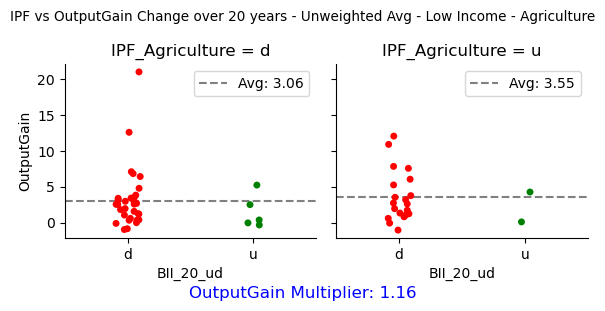

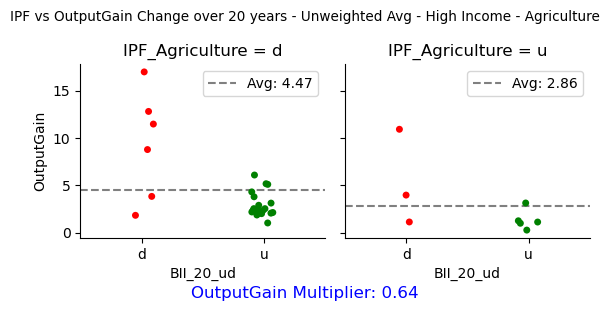

In [31]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    data=df[(df['Year'] == 1990) & (df['Income_level_2000'] == income)]
    avg_list=[]
    
    g = sns.catplot(x='BII_20_ud',y='OutputGain_20%', col='IPF_20_ud', data=data, ci=None, estimator=np.mean, height=3, aspect=1, palette=palette1, order=order1)
    g.set_axis_labels(y_var="OutputGain")
    
    for ax, (n, group) in zip(g.axes.flatten(), df[df['Income_level_2000'] == income].groupby('IPF_20_ud')):
        mean_val = group['OutputGain_20%'].mean()
        avg_list.append(mean_val)
        ax.axhline(mean_val, color='gray', linestyle='--', label=f'Avg: {mean_val:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {n}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[1]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
            ha='center', va='bottom', fontsize=12, color='blue')

    plt.subplots_adjust(top=0.8) 
    g.fig.suptitle('IPF vs OutputGain Change over 20 years - Unweighted Avg - '+income+' - {}'.format(name), fontsize=9.8)
    plt.savefig('IPF vs OutputGain Change over 20 years - Unweighted Avg - '+income+' - {}'.format(name))
    plt.show()

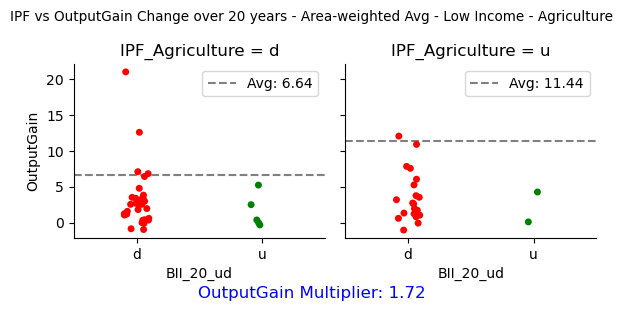

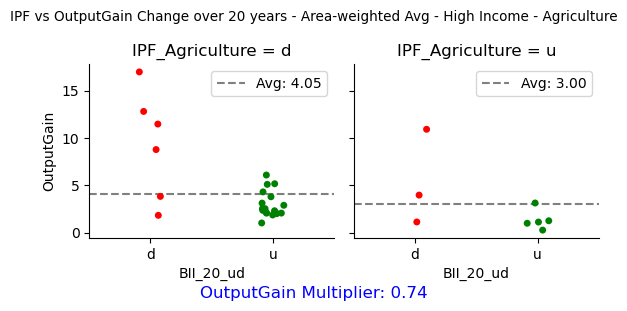

In [32]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    data=df[(df['Year'] == 1990) & (df['Income_level_2000'] == income)]
    avg_list=[]
    
    g = sns.catplot(x='BII_20_ud',y='OutputGain_20%', col='IPF_20_ud', data=data, ci=None, estimator=np.mean, height=3, aspect=1, palette=palette1, order=order1)
    g.set_axis_labels(y_var="OutputGain")

    for ax, (n, group) in zip(g.axes.flatten(), df[df['Income_level_2000'] == income].groupby('IPF_20_ud')):
        weighted_avg = np.average(group['Econ Gain_20%'], weights=group['Land_area_2000'])
        avg_list.append(weighted_avg)
        ax.axhline(weighted_avg, color='gray', linestyle='--', label=f'Avg: {weighted_avg:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {n}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[1]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
            ha='center', va='bottom', fontsize=12, color='blue')

    plt.subplots_adjust(top=0.8) 
    g.fig.suptitle('IPF vs OutputGain Change over 20 years - Area-weighted Avg - '+income+' - {}'.format(name), fontsize=9.8)
    plt.savefig('IPF vs OutputGain Change over 20 years - Area-weighted Avg - '+income+' - {}'.format(name))
    plt.show()

In [33]:
from PIL import Image

# List of images to combine
image_filenames = [
    'IPF vs OutputGain Change over 20 years - Unweighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 20 years - Unweighted Avg - High Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 20 years - Area-weighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 20 years - Area-weighted Avg - High Income - {}.png'.format(name)
]

# Open images and calculate total width and max height
images = [Image.open(img) for img in image_filenames]

# Assuming all images are the same size
img_width, img_height = images[0].size

padding = 30  # 10 pixels padding
new_image = Image.new('RGB', (img_width * 2 + padding, img_height * 2 + padding), 'white')

# Define positions for pasting images (added padding)
positions = [(0, 0), (0, img_height + padding), (img_width + padding, 0), (img_width + padding, img_height + padding)]


# Paste images into the new image at the defined positions
for img, pos in zip(images, positions):
    new_image.paste(img, pos)

# Save the combined image
new_image.save('Unweighted_Area-weighted_2x2_OutputGain.png')
new_image.show()

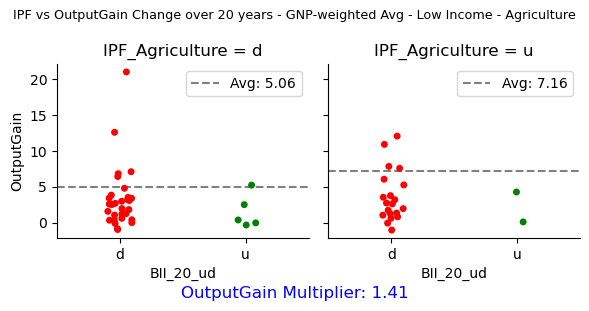

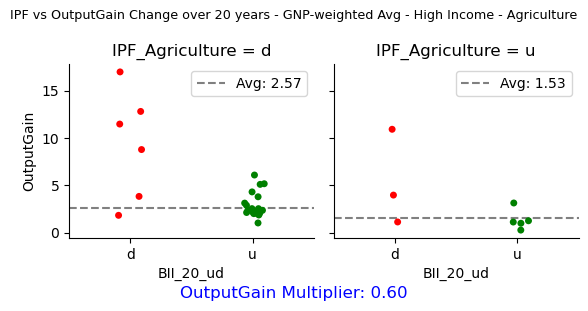

In [34]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    data=df[(df['Year'] == 1990) & (df['Income_level_2000'] == income)]
    avg_list=[]
    
    g = sns.catplot(x='BII_20_ud',y='OutputGain_20%', col='IPF_20_ud', data=data, ci=None, estimator=np.mean, height=3, aspect=1, palette=palette1, order=order1)
    g.set_axis_labels(y_var="OutputGain")

    for ax, (n, group) in zip(g.axes.flatten(), df[df['Income_level_2000'] == income].groupby('IPF_20_ud')):
        weighted_avg = np.average(group['OutputGain_20%'], weights=group['OutputGain_2000'])
        avg_list.append(weighted_avg)
        ax.axhline(weighted_avg, color='gray', linestyle='--', label=f'Avg: {weighted_avg:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {n}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[1]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
            ha='center', va='bottom', fontsize=12, color='blue')

    plt.subplots_adjust(top=0.8) 
    g.fig.suptitle('IPF vs OutputGain Change over 20 years - GNP-weighted Avg - '+income+' - {}'.format(name), fontsize=9.2)
    plt.savefig('IPF vs OutputGain Change over 20 years - GNP-weighted Avg - '+income+' - {}'.format(name))
    plt.show()

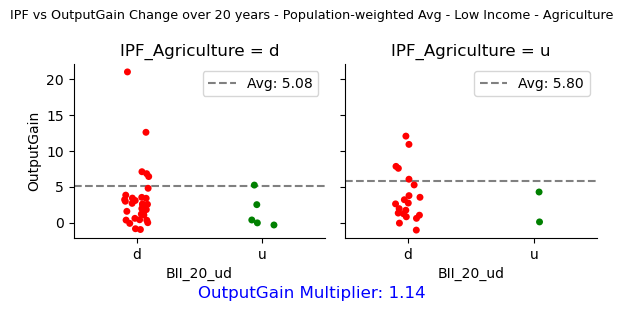

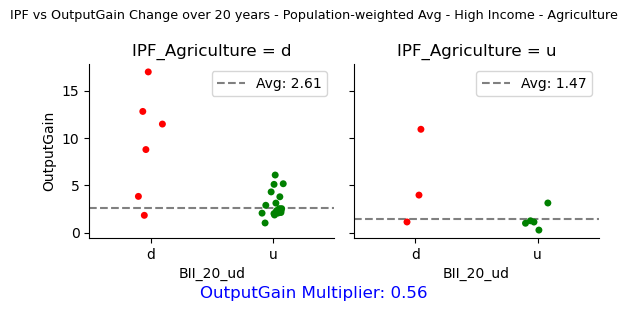

In [35]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    data=df[(df['Year'] == 1990) & (df['Income_level_2000'] == income)]
    avg_list=[]
    
    g = sns.catplot(x='BII_20_ud',y='OutputGain_20%', col='IPF_20_ud', data=data, ci=None, estimator=np.mean, height=3, aspect=1, palette=palette1, order=order1)
    g.set_axis_labels(y_var="OutputGain")

    for ax, (n, group) in zip(g.axes.flatten(), df[df['Income_level_2000'] == income].groupby('IPF_20_ud')):
        weighted_avg = np.average(group['OutputGain_20%'], weights=group['Population_2000'])
        avg_list.append(weighted_avg)
        ax.axhline(weighted_avg, color='gray', linestyle='--', label=f'Avg: {weighted_avg:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {n}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[1]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
            ha='center', va='bottom', fontsize=12, color='blue')

    plt.subplots_adjust(top=0.8) 
    g.fig.suptitle('IPF vs OutputGain Change over 20 years - Population-weighted Avg - '+income+' - {}'.format(name), fontsize=9.2)
    plt.savefig('IPF vs OutputGain Change over 20 years - Population-weighted Avg - '+income+' - {}'.format(name))
    plt.show()

In [36]:
from PIL import Image

# List of images to combine
image_filenames = [
    'IPF vs OutputGain Change over 20 years - GNP-weighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 20 years - GNP-weighted Avg - High Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 20 years - Population-weighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 20 years - Population-weighted Avg - High Income - {}.png'.format(name)
]

# Open images and calculate total width and max height
images = [Image.open(img) for img in image_filenames]

# Assuming all images are the same size
img_width, img_height = images[0].size

padding = 30  # 10 pixels padding
new_image = Image.new('RGB', (img_width * 2 + padding, img_height * 2 + padding), 'white')

# Define positions for pasting images (added padding)
positions = [(0, 0), (0, img_height + padding), (img_width + padding, 0), (img_width + padding, img_height + padding)]


# Paste images into the new image at the defined positions
for img, pos in zip(images, positions):
    new_image.paste(img, pos)

# Save the combined image
new_image.save('GNP-weighted_Population-weighted_2x2_OutputGain.png')
new_image.show()

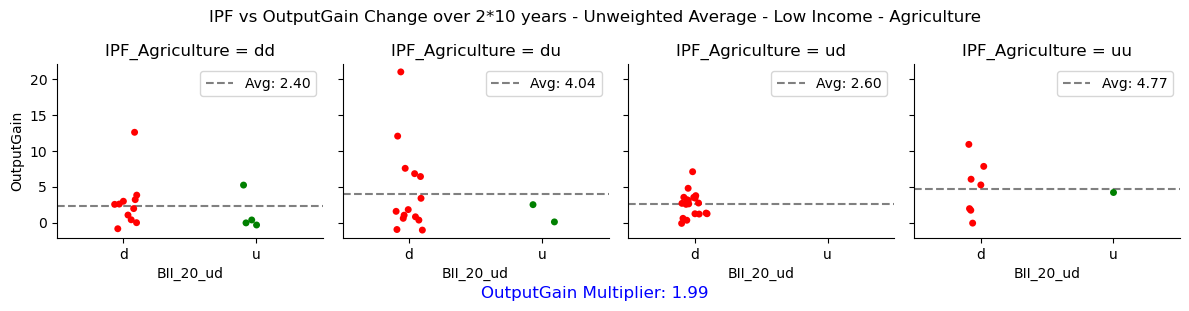

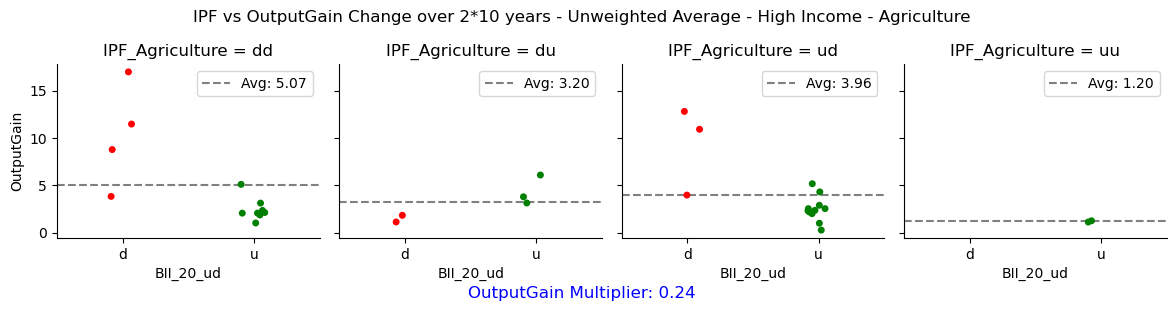

In [37]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    avg_list=[]
    df_year=df[(df['Year'] == 1990) & (df['IPF_20_ud'].isin(['u', 'd'])) & (df['Income_level_2000']==income)]
    g = sns.FacetGrid(df_year, col='IPF_10_uudd', height=3, aspect=1, col_order=['dd', 'du', 'ud', 'uu'])
    g.map(sns.stripplot, 'BII_20_ud', 'OutputGain_20%', jitter=True, palette=palette1, order=order1, size=5)
    g.set_axis_labels('BII_20_ud', 'OutputGain')
    g.set_titles('IPF_10_uudd = {col_name}')

    for ax, (ipf_val, group) in zip(g.axes.flatten(), df_year.groupby('IPF_10_uudd')):
        # Plot mean for BII='d'
        mean_d = group['OutputGain_20%'].mean()
        avg_list.append(mean_d)
        ax.axhline(mean_d, color='grey', linestyle='--', label=f'Avg: {mean_d:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {ipf_val}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[3]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
                ha='center', va='bottom', fontsize=12, color='blue')
    
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('IPF vs OutputGain Change over 2*10 years - Unweighted Average - '+income+' - {}'.format(name))
    plt.savefig('IPF vs OutputGain Change over 2*10 years - Unweighted Average - '+income+' - {}'.format(name))
    plt.show()

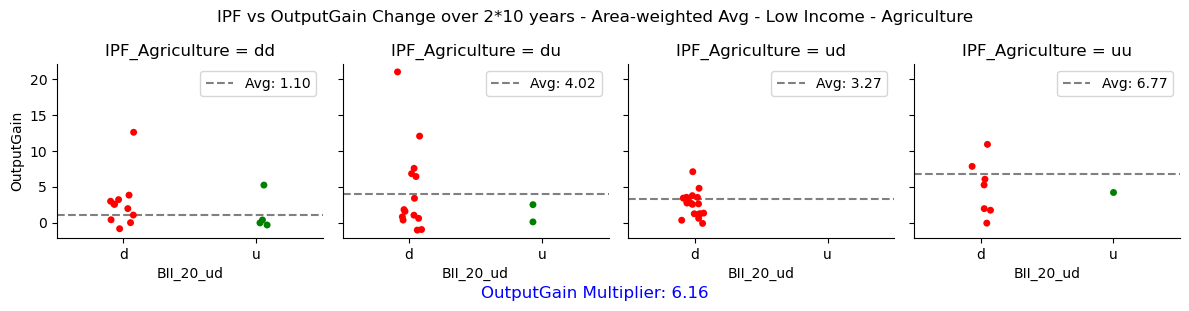

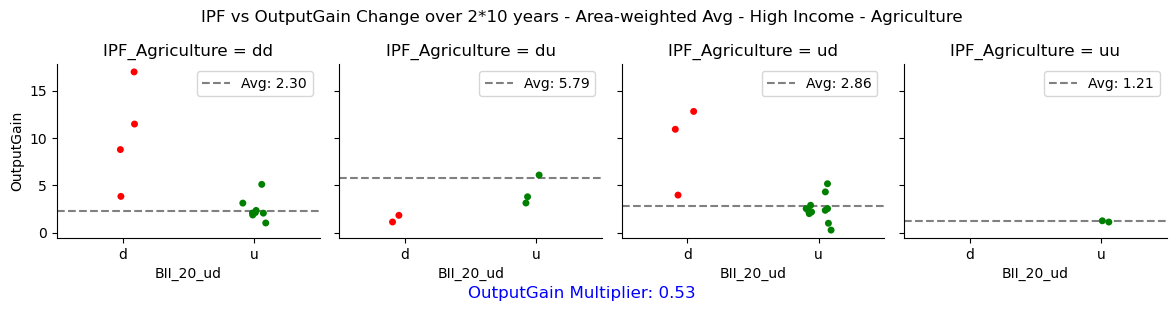

In [38]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    avg_list=[]
    df_year=df[(df['Year'] == 1990) & (df['IPF_20_ud'].isin(['u', 'd'])) & (df['Income_level_2000']==income)]
    g = sns.FacetGrid(df_year, col='IPF_10_uudd', height=3, aspect=1, col_order=['dd', 'du', 'ud', 'uu'])
    g.map(sns.stripplot, 'BII_20_ud', 'OutputGain_20%', jitter=True, palette=palette1, order=order1, size=5)
    g.set_axis_labels('BII_20_ud', 'OutputGain')
    g.set_titles('IPF_10_uudd = {col_name}')

    for ax, (ipf_val, group) in zip(g.axes.flatten(), df_year.groupby('IPF_10_uudd')):
        # Plot mean for BII='d'
        weighted_avg = np.average(group['OutputGain_20%'], weights=group['Land_area_2000'])
        avg_list.append(weighted_avg)
        ax.axhline(weighted_avg, color='grey', linestyle='--', label=f'Avg: {weighted_avg:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {ipf_val}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[3]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
                ha='center', va='bottom', fontsize=12, color='blue')
    
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('IPF vs OutputGain Change over 2*10 years - Area-weighted Avg - '+income+' - {}'.format(name))
    plt.savefig('IPF vs OutputGain Change over 2*10 years - Area-weighted Avg - '+income+' - {}'.format(name))    
    plt.show()

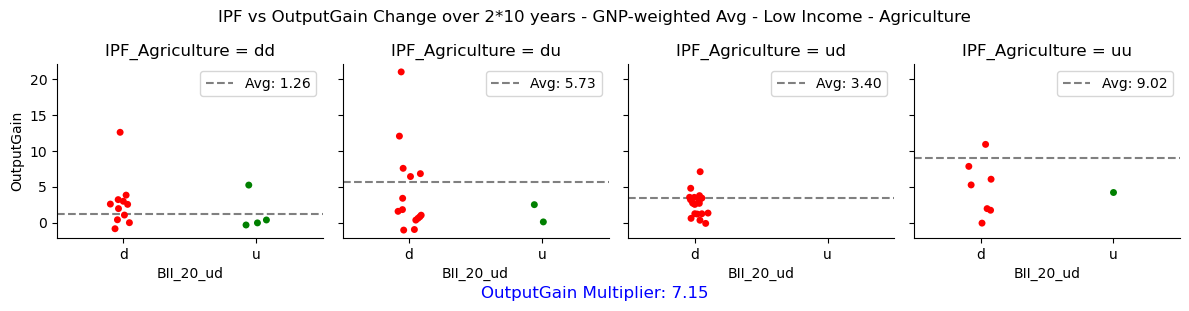

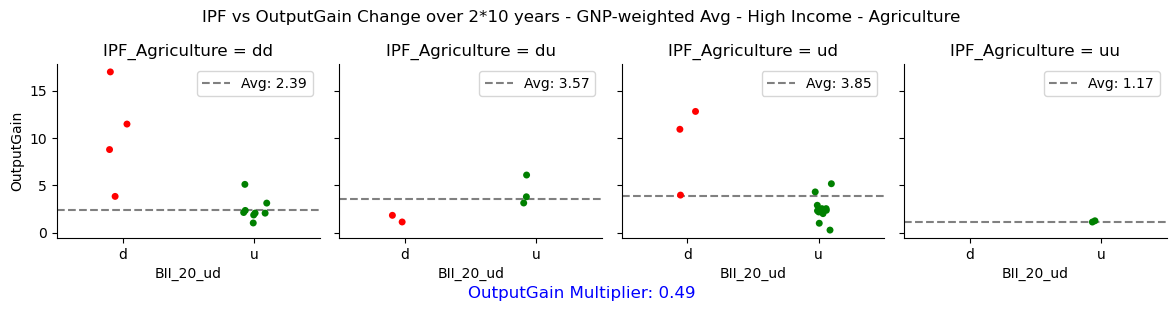

In [39]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    avg_list=[]
    df_year=df[(df['Year'] == 1990) & (df['IPF_20_ud'].isin(['u', 'd'])) & (df['Income_level_2000']==income)]
    g = sns.FacetGrid(df_year, col='IPF_10_uudd', height=3, aspect=1, col_order=['dd', 'du', 'ud', 'uu'])
    g.map(sns.stripplot, 'BII_20_ud', 'OutputGain_20%', jitter=True, palette=palette1, order=order1, size=5)
    g.set_axis_labels('BII_20_ud', 'OutputGain')
    g.set_titles('IPF_10_uudd = {col_name}')

    for ax, (ipf_val, group) in zip(g.axes.flatten(), df_year.groupby('IPF_10_uudd')):
        # Plot mean for BII='d'
        weighted_avg = np.average(group['OutputGain_20%'], weights=group['OutputGain_2000'])
        avg_list.append(weighted_avg)
        ax.axhline(weighted_avg, color='grey', linestyle='--', label=f'Avg: {weighted_avg:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {ipf_val}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[3]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
                ha='center', va='bottom', fontsize=12, color='blue')
    
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('IPF vs OutputGain Change over 2*10 years - GNP-weighted Avg - '+income+' - {}'.format(name))
    plt.savefig('IPF vs OutputGain Change over 2*10 years - GNP-weighted Avg - '+income+' - {}'.format(name))    
    plt.show()

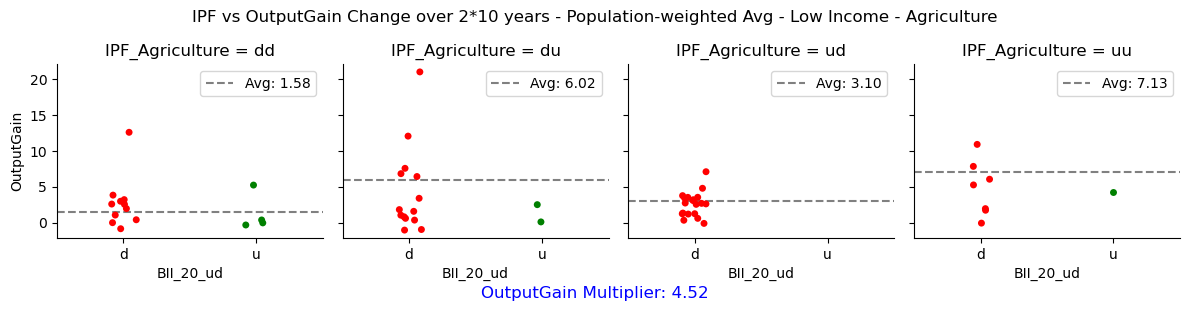

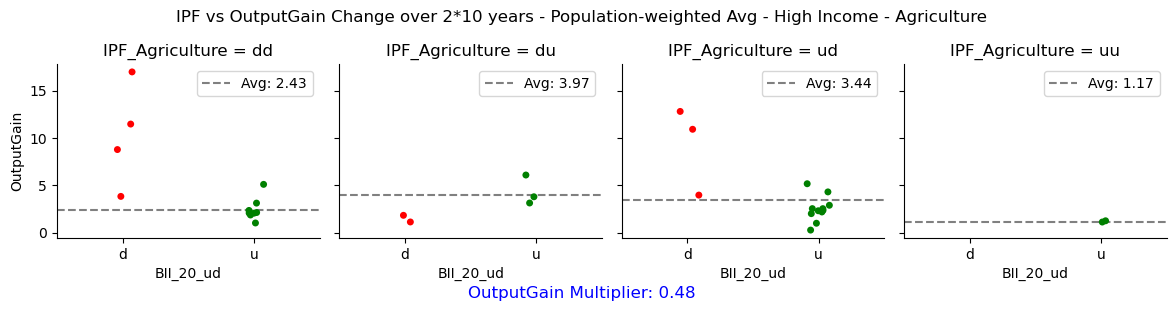

In [40]:
group=['Low Income','High Income']

for i, income in enumerate(group):
    avg_list=[]
    df_year=df[(df['Year'] == 1990) & (df['IPF_20_ud'].isin(['u', 'd'])) & (df['Income_level_2000']==income)]
    g = sns.FacetGrid(df_year, col='IPF_10_uudd', height=3, aspect=1, col_order=['dd', 'du', 'ud', 'uu'])
    g.map(sns.stripplot, 'BII_20_ud', 'OutputGain_20%', jitter=True, palette=palette1, order=order1, size=5)
    g.set_axis_labels('BII_20_ud', 'OutputGain')
    g.set_titles('IPF_10_uudd = {col_name}')

    for ax, (ipf_val, group) in zip(g.axes.flatten(), df_year.groupby('IPF_10_uudd')):
        # Plot mean for BII='d'
        weighted_avg = np.average(group['OutputGain_20%'], weights=group['Population_2000'])
        avg_list.append(weighted_avg)
        ax.axhline(weighted_avg, color='grey', linestyle='--', label=f'Avg: {weighted_avg:.2f}')
        ax.legend(loc='upper right')
        ax.set_title(f"IPF_{name} = {ipf_val}") # rename the title

    plt.subplots_adjust(top=0.85, bottom=0.22) 

    multiplier=avg_list[3]/avg_list[0]
    plt.figtext(0.5, 0.01, f'OutputGain Multiplier: {multiplier:.2f}', 
                ha='center', va='bottom', fontsize=12, color='blue')
    
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('IPF vs OutputGain Change over 2*10 years - Population-weighted Avg - '+income+' - {}'.format(name))
    plt.savefig('IPF vs OutputGain Change over 2*10 years - Population-weighted Avg - '+income+' - {}'.format(name))    
    plt.show()

In [41]:
from PIL import Image

# List of image filenames
image_filenames = [
    'IPF vs OutputGain Change over 2*10 years - Unweighted Average - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - Unweighted Average - High Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - Area-weighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - Area-weighted Avg - High Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - GNP-weighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - GNP-weighted Avg - High Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - Population-weighted Avg - Low Income - {}.png'.format(name),
    'IPF vs OutputGain Change over 2*10 years - Population-weighted Avg - High Income - {}.png'.format(name)
]

# Open images
images = [Image.open(img) for img in image_filenames]

# Standardize image sizes (using the size of the first image as reference)
standard_width, standard_height = images[0].size  # Standard size based on the first image
standard_images = [img.resize((standard_width, standard_height), Image.ANTIALIAS) for img in images]

padding = 30  # Pixels padding

# Calculate the new image dimensions
total_width = standard_width + padding  # Only one image width because stacking vertically
total_height = (standard_height + padding) * len(standard_images) - padding  # Total height including padding

# Create a new blank image
new_image = Image.new('RGB', (total_width, total_height), 'white')

# Define positions for pasting images
positions = [(0, i * (standard_height + padding)) for i in range(len(standard_images))]

# Paste images into the new image at the defined positions
for img, pos in zip(standard_images, positions):
    new_image.paste(img, pos)

# Save and show the combined image
new_image.save('Supplementary_figure_1x8_OutputGain.png')
new_image.show()

In [19]:
df.to_excel('Econ Gain_all sector_calculation.xlsx')